# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [ ]:
! pip install Pillow

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [ ]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 15.30 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
!ls MNIST

processed  raw


In [ ]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [ ]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

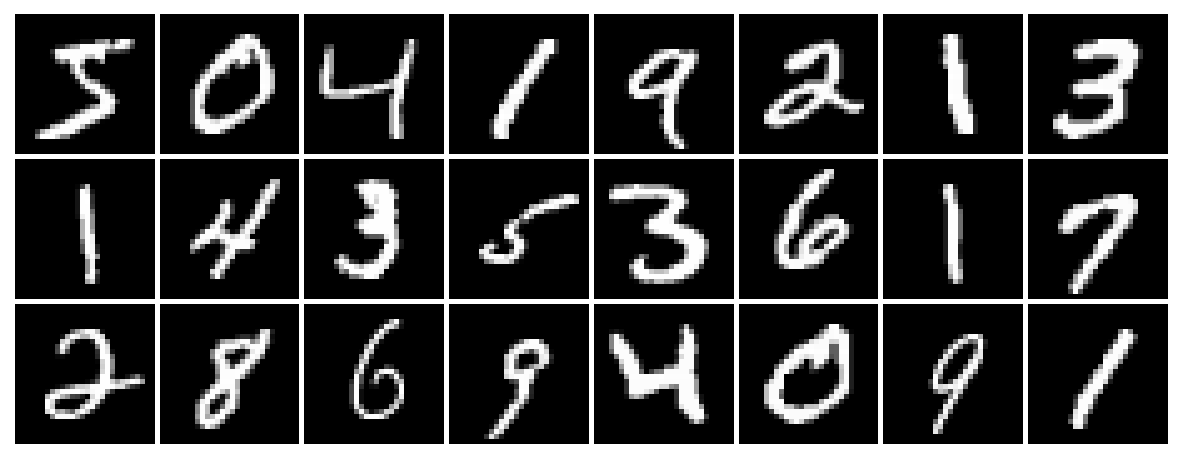

In [ ]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


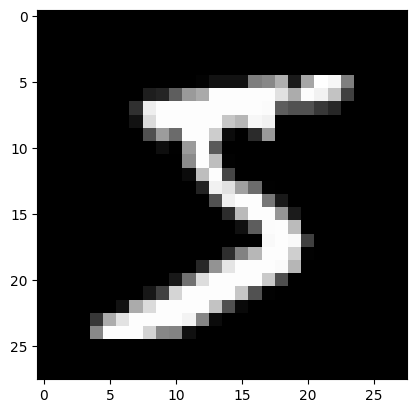

In [ ]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [ ]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [ ]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[-0.2567,  0.0109,  0.2023, -0.0138, -0.4766, -0.0860,  0.2016,  0.1421,
          0.0669,  0.3185],
        [-0.0485, -0.1011, -0.2764,  0.1286, -0.3616, -0.0399,  0.0059,  0.0973,
         -0.1228, -0.0369],
        [-0.0692, -0.0739,  0.0725, -0.2062, -0.2570, -0.2532,  0.0256,  0.1757,
         -0.1296, -0.0390],
        [-0.2661, -0.0168, -0.3407,  0.0386,  0.0714, -0.0610,  0.2877, -0.0465,
          0.0617,  0.2649],
        [-0.2187, -0.1942, -0.1867,  0.0041, -0.0342, -0.3131,  0.1378,  0.4633,
          0.2122,  0.0149]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [ ]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [ ]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-ts3mxlvp
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-ts3mxlvp
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━

In [ ]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.3105, grad_fn=<NllLossBackward0>)

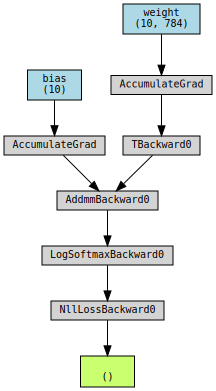

In [ ]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [ ]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()


In [ ]:
print('Final loss:', loss.item())

Final loss: 0.26481160521507263


### Visualizando gráfico de perda durante o treinamento

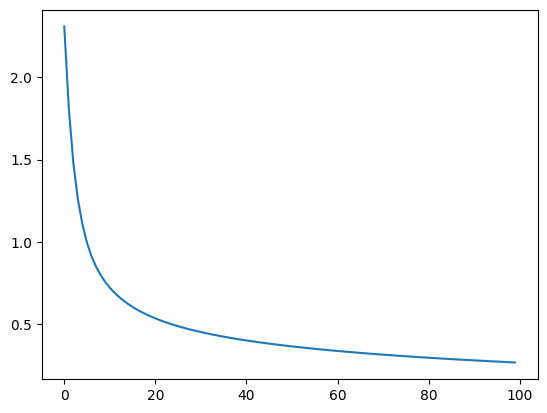

In [ ]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [ ]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.942


### Matriz de confusão com dados de treinamento e teste

In [ ]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,97,0,1,0,0,0,1,0,0,2
1,0,110,1,0,0,0,2,3,1,0
2,0,1,91,1,0,1,1,1,2,1
3,0,0,0,87,0,2,0,0,0,0
4,0,0,1,0,102,1,0,2,0,3
5,0,2,0,2,0,83,0,0,2,1
6,0,0,1,1,2,2,90,0,0,0
7,0,1,1,1,0,0,0,110,0,3
8,0,2,2,0,0,1,0,0,82,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


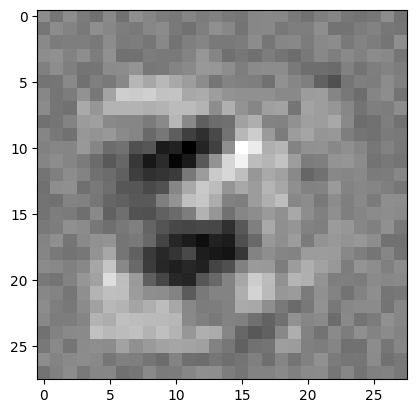

In [ ]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

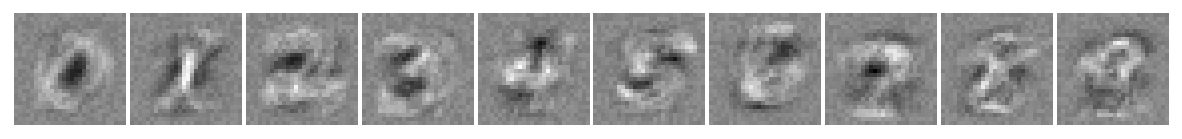

In [ ]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

In [ ]:
#1-
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))

Epoch[1/100], loss: 0.263480, acc: 0.942000
Epoch[2/100], loss: 0.262164, acc: 0.942000
Epoch[3/100], loss: 0.260864, acc: 0.942000
Epoch[4/100], loss: 0.259579, acc: 0.944000
Epoch[5/100], loss: 0.258309, acc: 0.945000
Epoch[6/100], loss: 0.257053, acc: 0.945000
Epoch[7/100], loss: 0.255811, acc: 0.945000
Epoch[8/100], loss: 0.254583, acc: 0.946000
Epoch[9/100], loss: 0.253369, acc: 0.946000
Epoch[10/100], loss: 0.252168, acc: 0.946000
Epoch[11/100], loss: 0.250980, acc: 0.946000
Epoch[12/100], loss: 0.249805, acc: 0.947000
Epoch[13/100], loss: 0.248643, acc: 0.947000
Epoch[14/100], loss: 0.247493, acc: 0.947000
Epoch[15/100], loss: 0.246355, acc: 0.947000
Epoch[16/100], loss: 0.245228, acc: 0.947000
Epoch[17/100], loss: 0.244113, acc: 0.948000
Epoch[18/100], loss: 0.243010, acc: 0.949000
Epoch[19/100], loss: 0.241918, acc: 0.949000
Epoch[20/100], loss: 0.240837, acc: 0.951000
Epoch[21/100], loss: 0.239766, acc: 0.951000
Epoch[22/100], loss: 0.238706, acc: 0.951000
Epoch[23/100], loss

Epoch[1/100], loss: 0.133656, acc: 0.977000


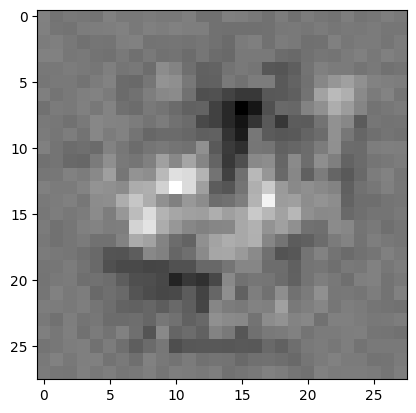

Epoch[2/100], loss: 0.133318, acc: 0.977000


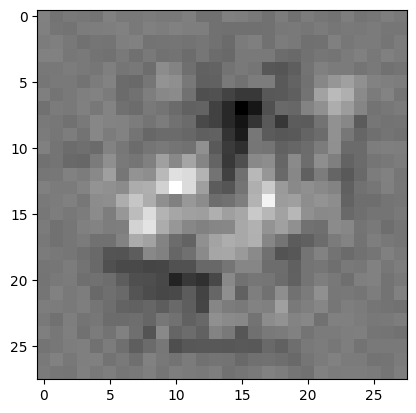

Epoch[3/100], loss: 0.132981, acc: 0.977000


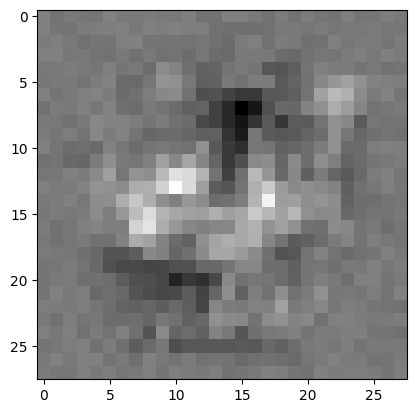

Epoch[4/100], loss: 0.132646, acc: 0.977000


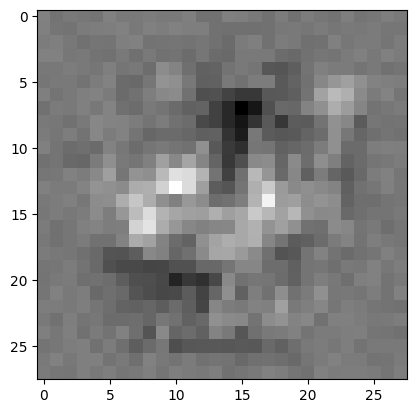

Epoch[5/100], loss: 0.132313, acc: 0.979000


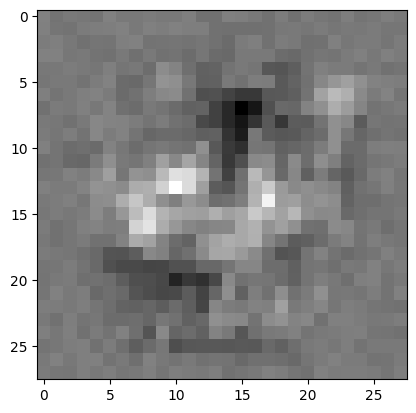

Epoch[6/100], loss: 0.131981, acc: 0.979000


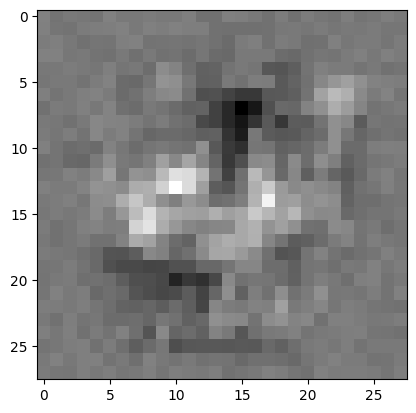

Epoch[7/100], loss: 0.131651, acc: 0.979000


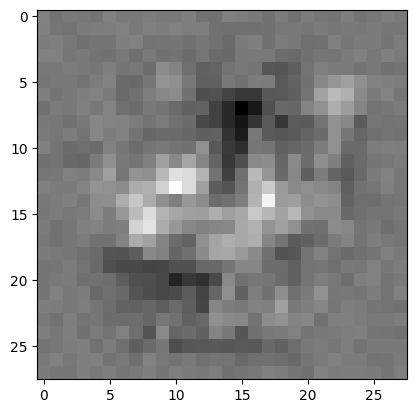

Epoch[8/100], loss: 0.131322, acc: 0.979000


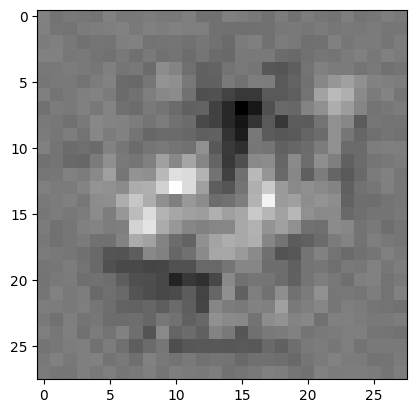

Epoch[9/100], loss: 0.130995, acc: 0.979000


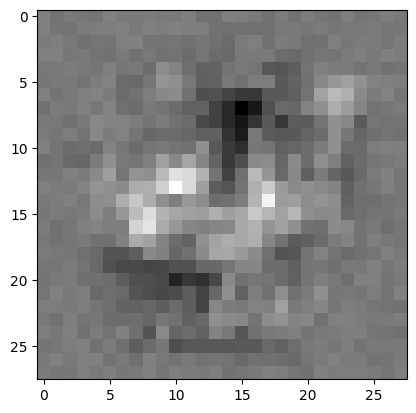

Epoch[10/100], loss: 0.130669, acc: 0.979000


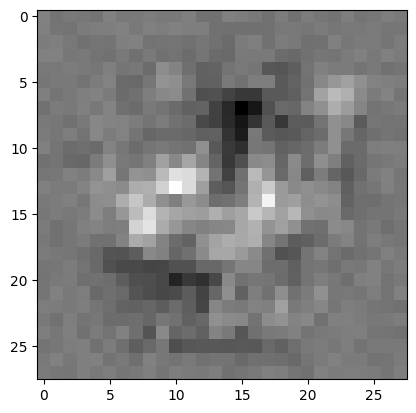

Epoch[11/100], loss: 0.130344, acc: 0.979000


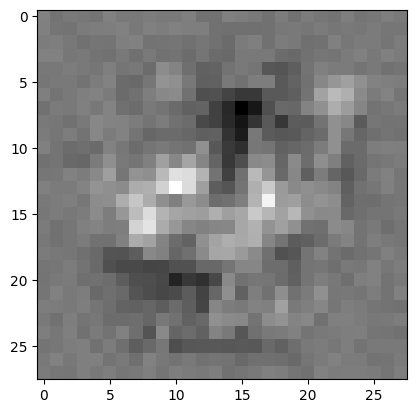

Epoch[12/100], loss: 0.130021, acc: 0.979000


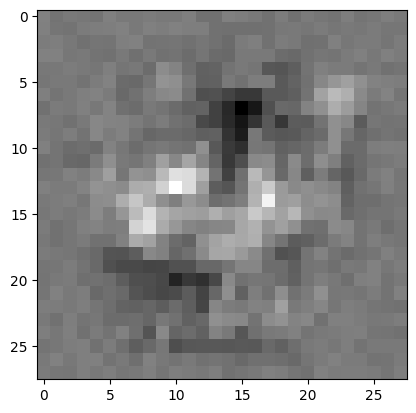

Epoch[13/100], loss: 0.129700, acc: 0.979000


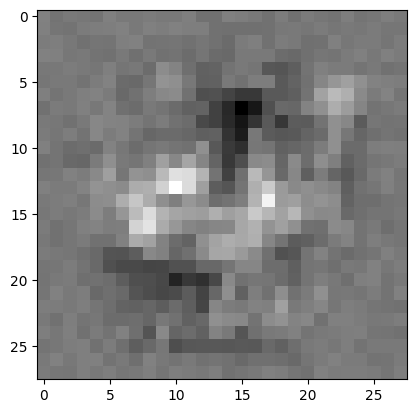

Epoch[14/100], loss: 0.129380, acc: 0.979000


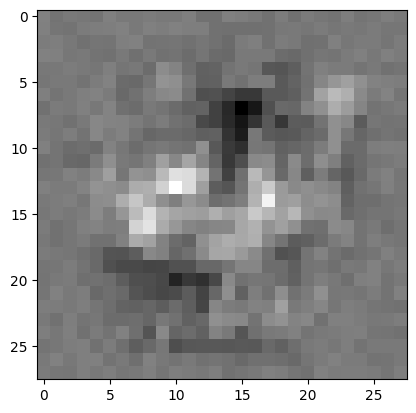

Epoch[15/100], loss: 0.129061, acc: 0.979000


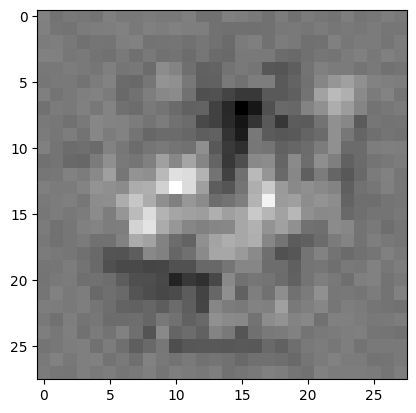

Epoch[16/100], loss: 0.128744, acc: 0.979000


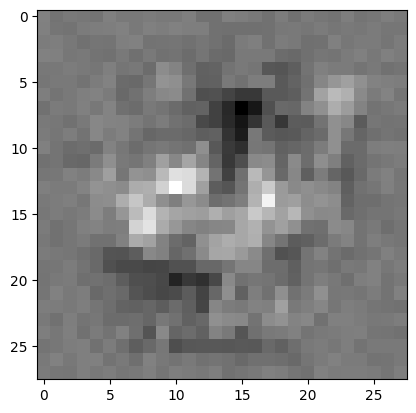

Epoch[17/100], loss: 0.128428, acc: 0.979000


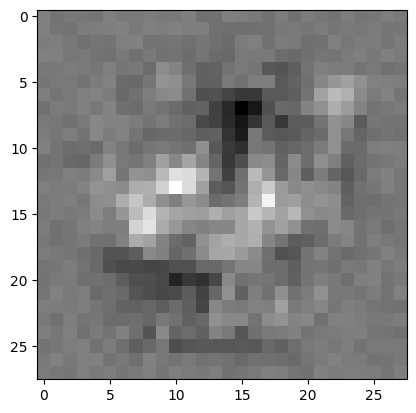

Epoch[18/100], loss: 0.128113, acc: 0.979000


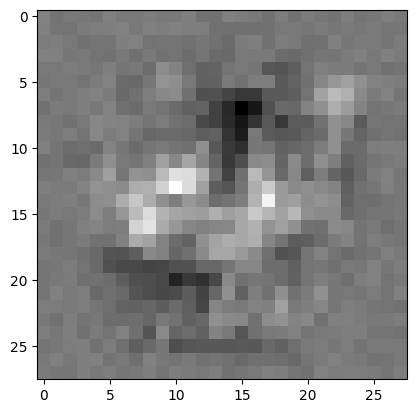

Epoch[19/100], loss: 0.127800, acc: 0.979000


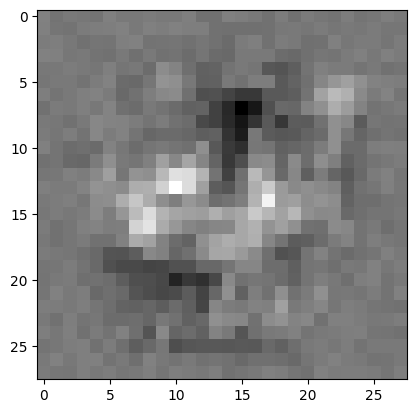

Epoch[20/100], loss: 0.127489, acc: 0.979000


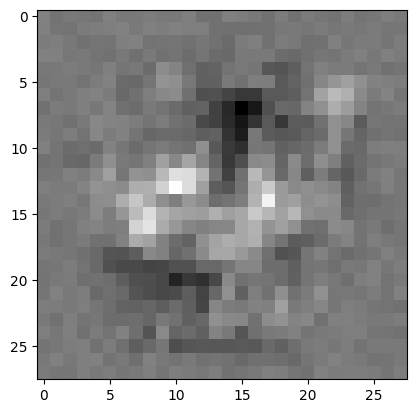

Epoch[21/100], loss: 0.127178, acc: 0.979000


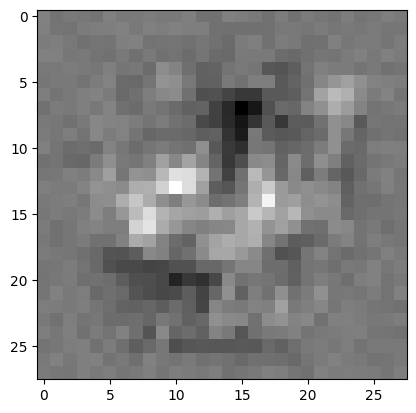

Epoch[22/100], loss: 0.126869, acc: 0.979000


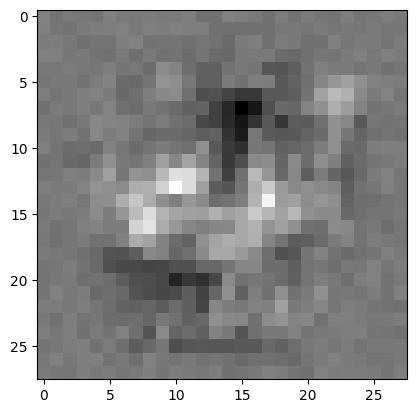

Epoch[23/100], loss: 0.126562, acc: 0.979000


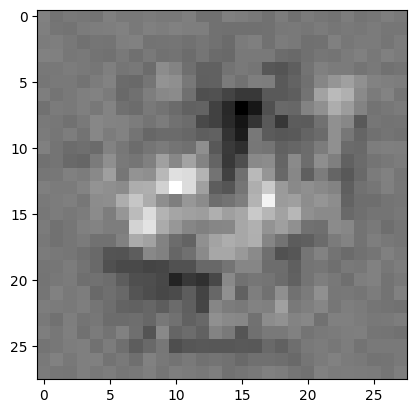

Epoch[24/100], loss: 0.126255, acc: 0.979000


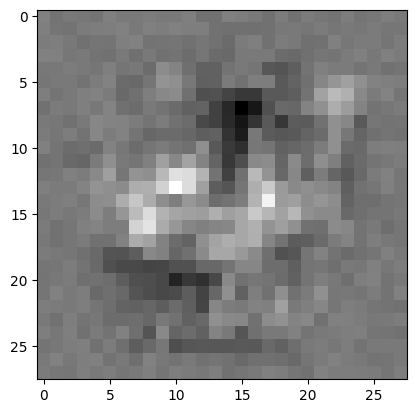

Epoch[25/100], loss: 0.125951, acc: 0.979000


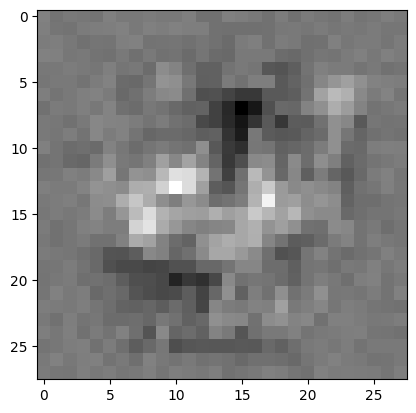

Epoch[26/100], loss: 0.125647, acc: 0.979000


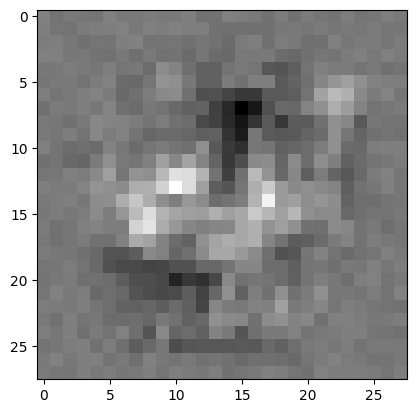

Epoch[27/100], loss: 0.125345, acc: 0.979000


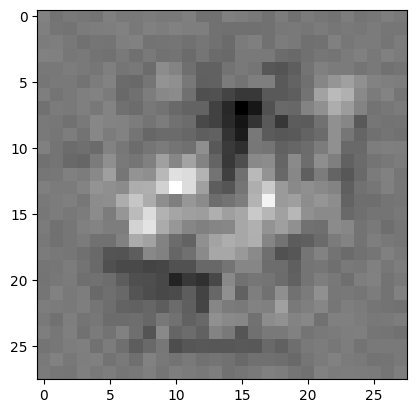

Epoch[28/100], loss: 0.125044, acc: 0.979000


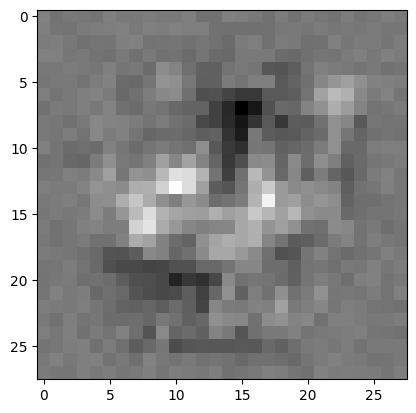

Epoch[29/100], loss: 0.124744, acc: 0.979000


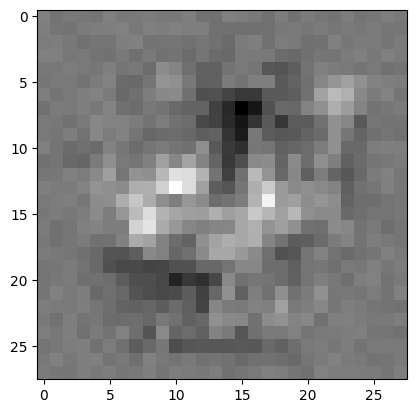

Epoch[30/100], loss: 0.124446, acc: 0.980000


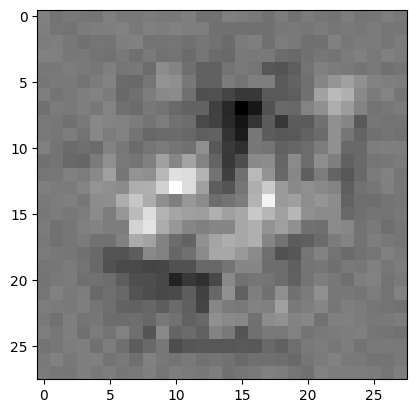

Epoch[31/100], loss: 0.124148, acc: 0.980000


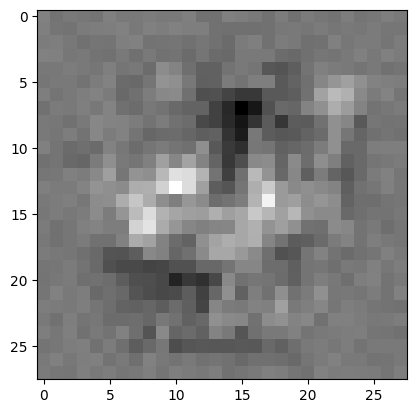

Epoch[32/100], loss: 0.123853, acc: 0.981000


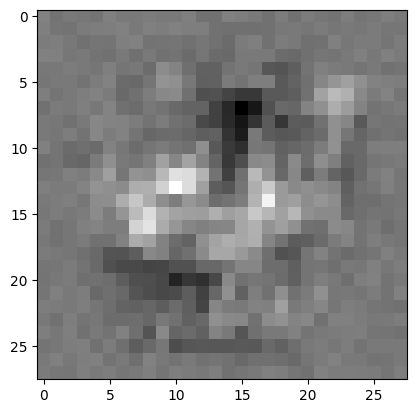

Epoch[33/100], loss: 0.123558, acc: 0.982000


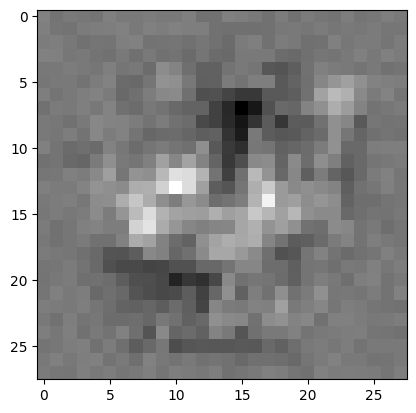

Epoch[34/100], loss: 0.123265, acc: 0.982000


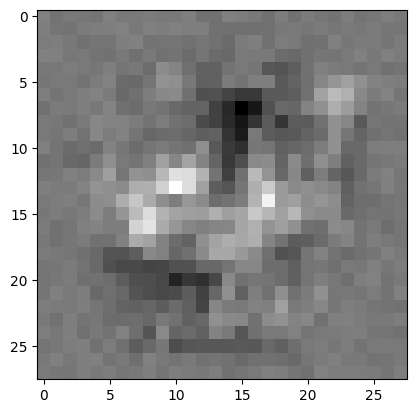

Epoch[35/100], loss: 0.122973, acc: 0.982000


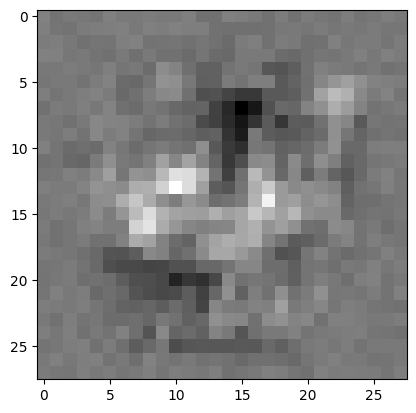

Epoch[36/100], loss: 0.122682, acc: 0.983000


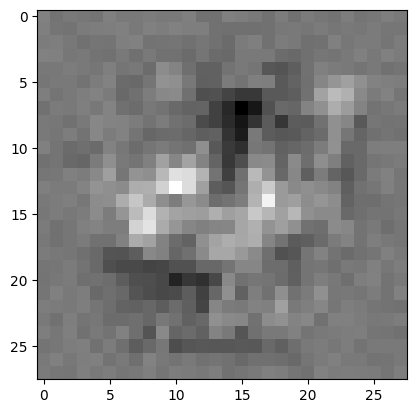

Epoch[37/100], loss: 0.122392, acc: 0.983000


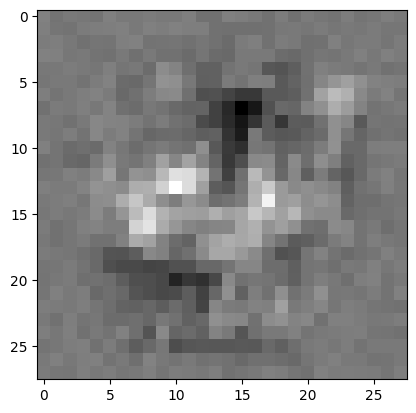

Epoch[38/100], loss: 0.122104, acc: 0.983000


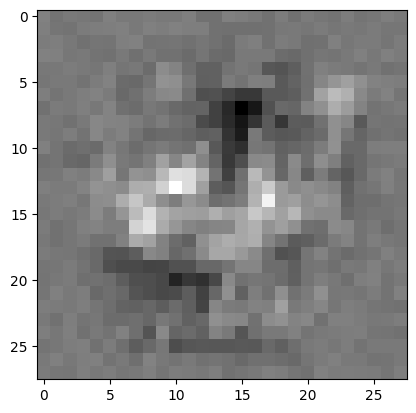

Epoch[39/100], loss: 0.121817, acc: 0.984000


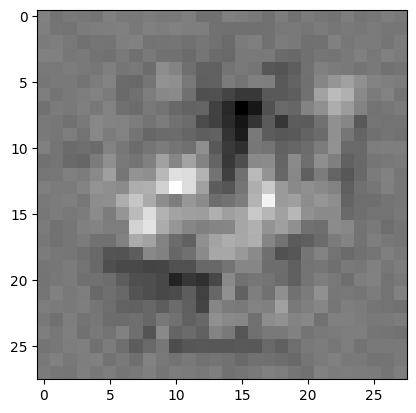

Epoch[40/100], loss: 0.121531, acc: 0.985000


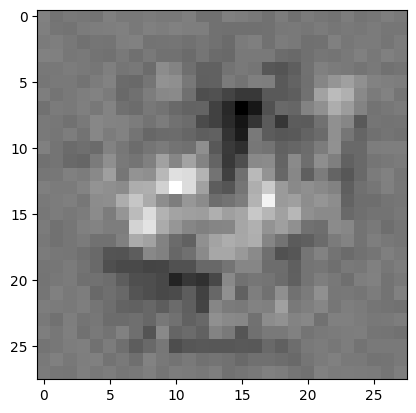

Epoch[41/100], loss: 0.121246, acc: 0.985000


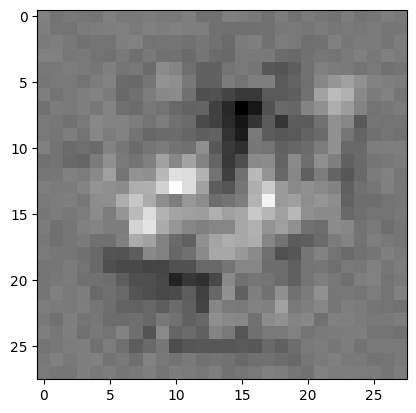

Epoch[42/100], loss: 0.120963, acc: 0.985000


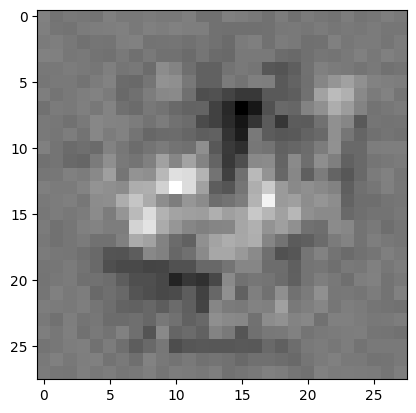

Epoch[43/100], loss: 0.120681, acc: 0.986000


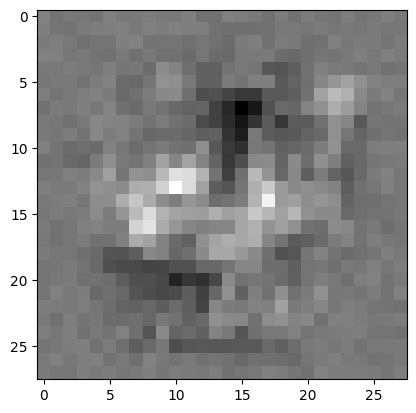

Epoch[44/100], loss: 0.120399, acc: 0.986000


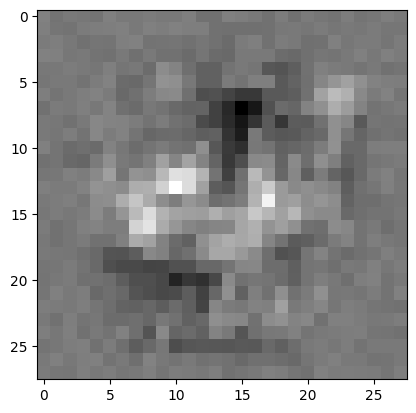

Epoch[45/100], loss: 0.120119, acc: 0.986000


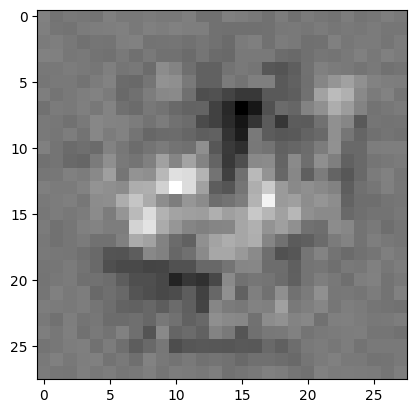

Epoch[46/100], loss: 0.119841, acc: 0.986000


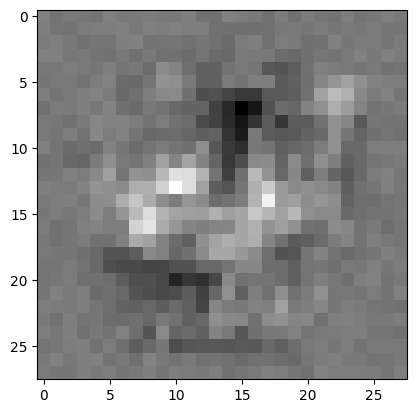

Epoch[47/100], loss: 0.119563, acc: 0.986000


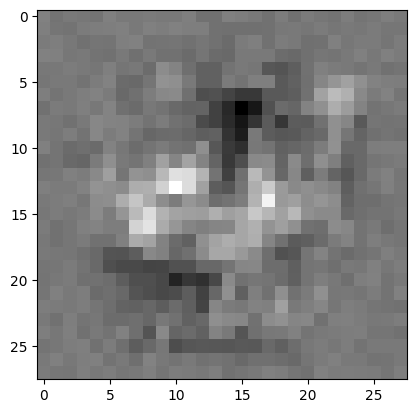

Epoch[48/100], loss: 0.119287, acc: 0.986000


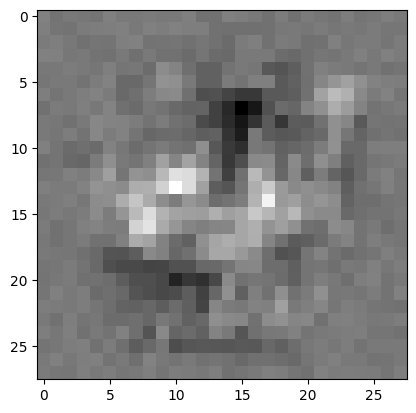

Epoch[49/100], loss: 0.119011, acc: 0.986000


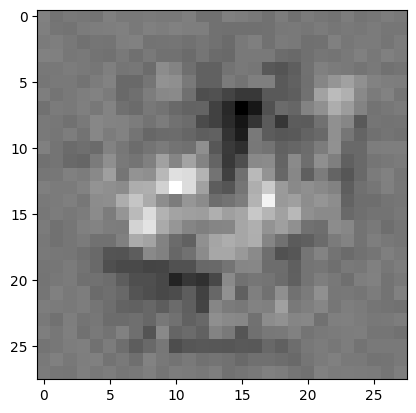

Epoch[50/100], loss: 0.118737, acc: 0.986000


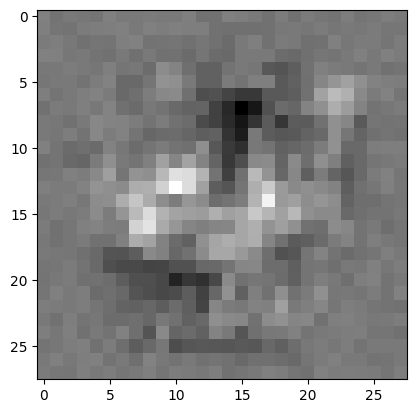

Epoch[51/100], loss: 0.118464, acc: 0.986000


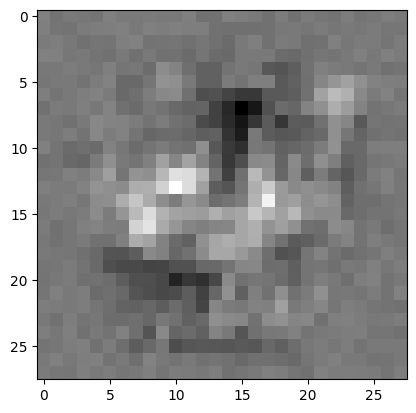

Epoch[52/100], loss: 0.118192, acc: 0.986000


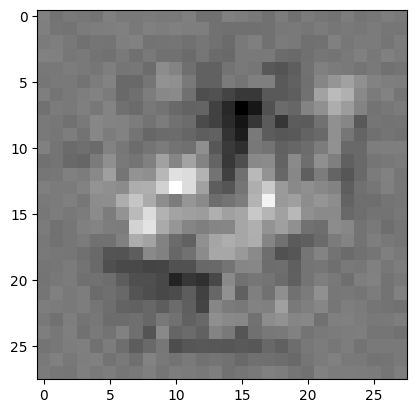

Epoch[53/100], loss: 0.117922, acc: 0.986000


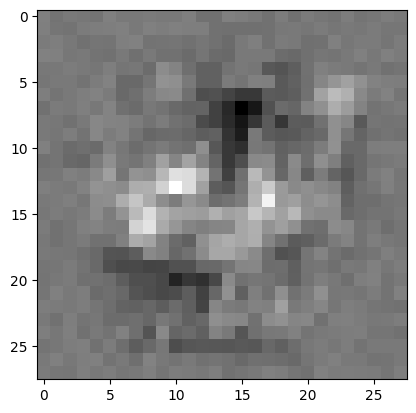

Epoch[54/100], loss: 0.117652, acc: 0.986000


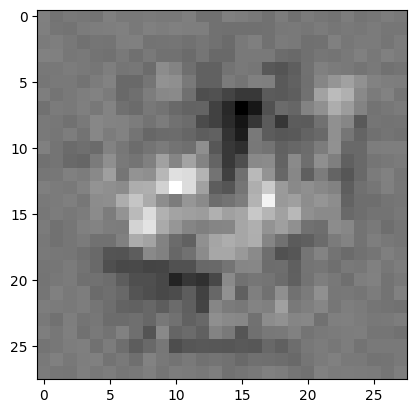

Epoch[55/100], loss: 0.117383, acc: 0.986000


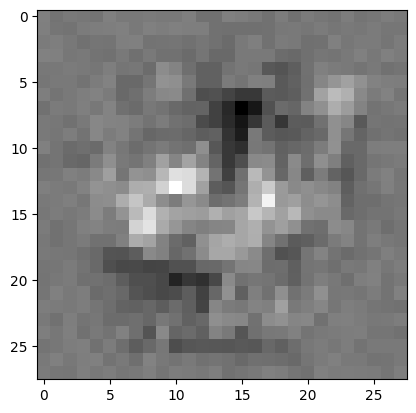

Epoch[56/100], loss: 0.117116, acc: 0.986000


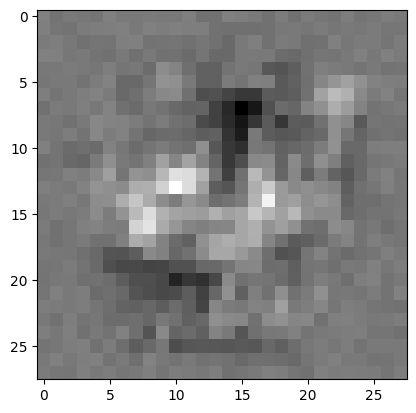

Epoch[57/100], loss: 0.116850, acc: 0.986000


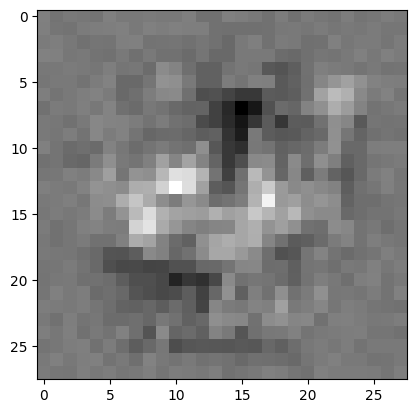

Epoch[58/100], loss: 0.116584, acc: 0.986000


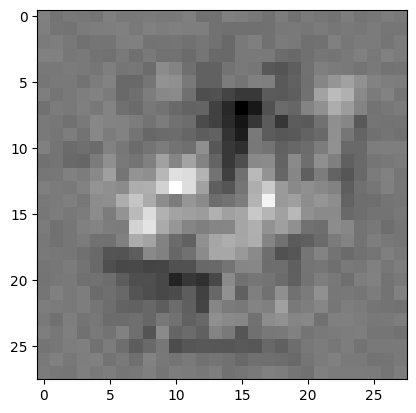

Epoch[59/100], loss: 0.116320, acc: 0.986000


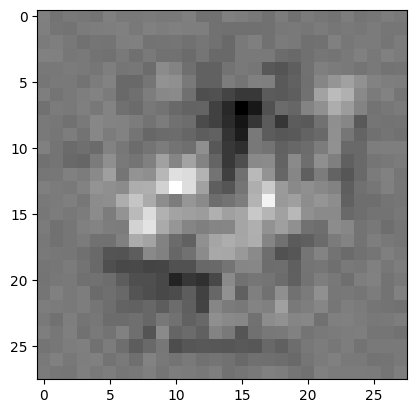

Epoch[60/100], loss: 0.116057, acc: 0.987000


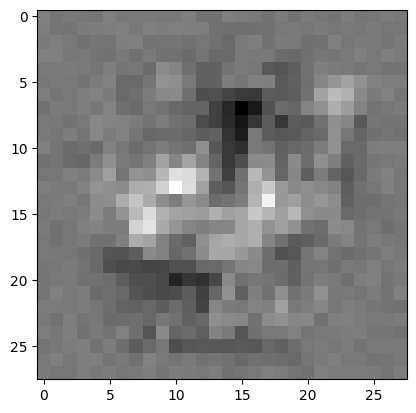

Epoch[61/100], loss: 0.115795, acc: 0.988000


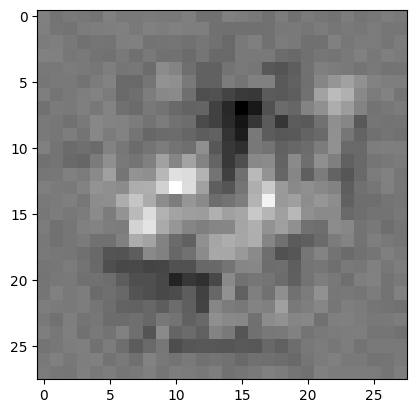

Epoch[62/100], loss: 0.115534, acc: 0.988000


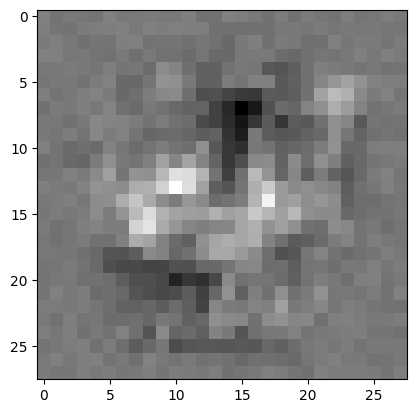

Epoch[63/100], loss: 0.115274, acc: 0.988000


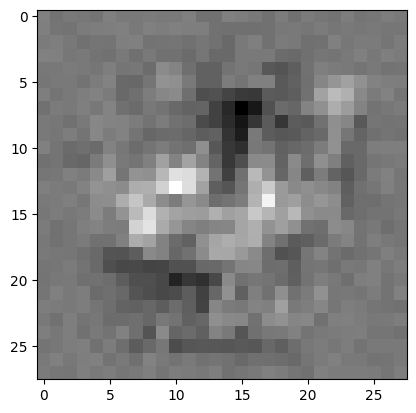

Epoch[64/100], loss: 0.115016, acc: 0.988000


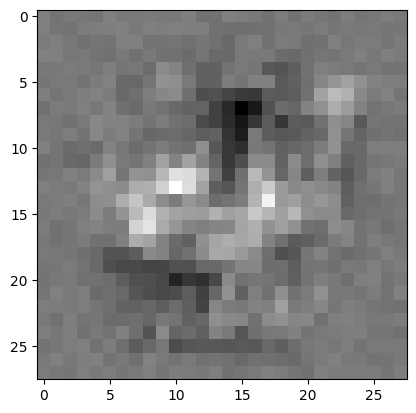

Epoch[65/100], loss: 0.114758, acc: 0.988000


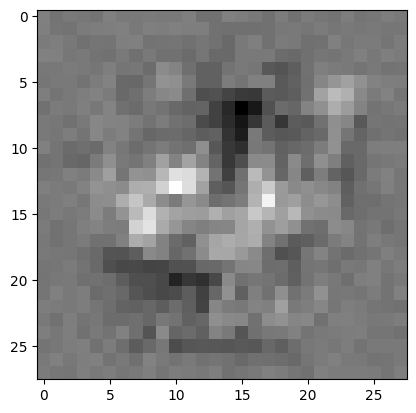

Epoch[66/100], loss: 0.114501, acc: 0.988000


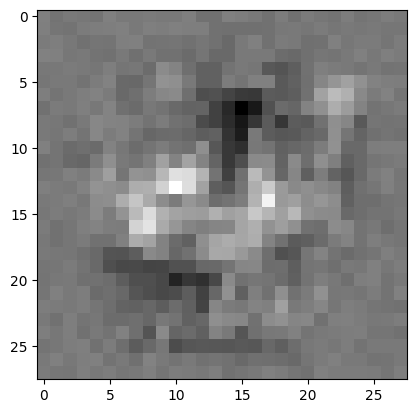

Epoch[67/100], loss: 0.114245, acc: 0.988000


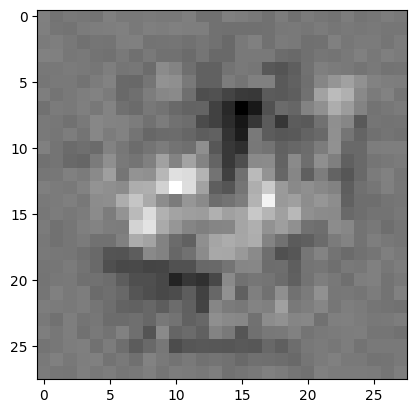

Epoch[68/100], loss: 0.113991, acc: 0.988000


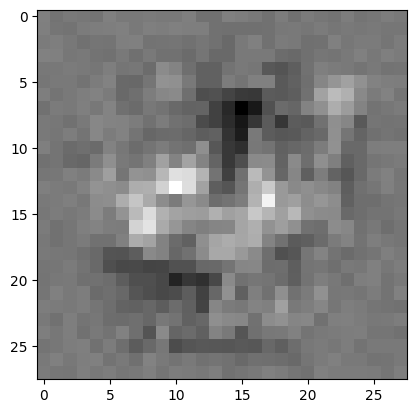

Epoch[69/100], loss: 0.113737, acc: 0.988000


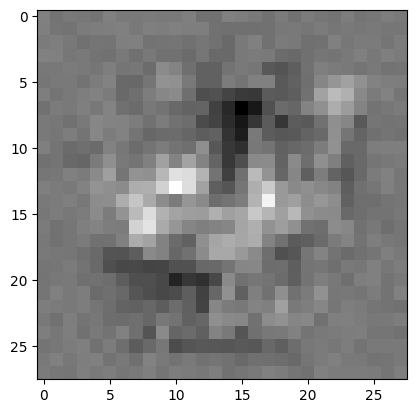

Epoch[70/100], loss: 0.113484, acc: 0.989000


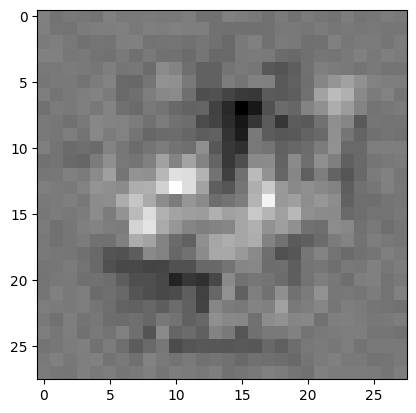

Epoch[71/100], loss: 0.113233, acc: 0.989000


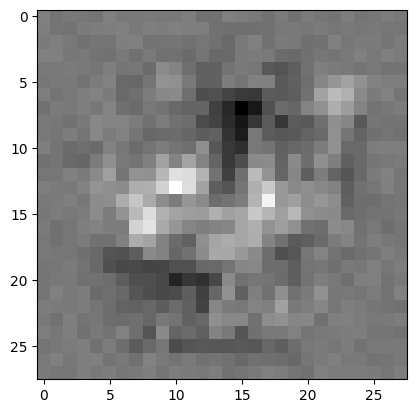

Epoch[72/100], loss: 0.112982, acc: 0.989000


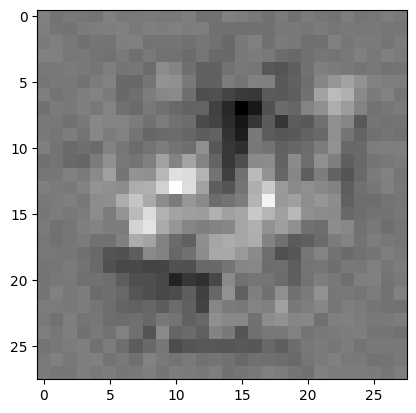

Epoch[73/100], loss: 0.112732, acc: 0.989000


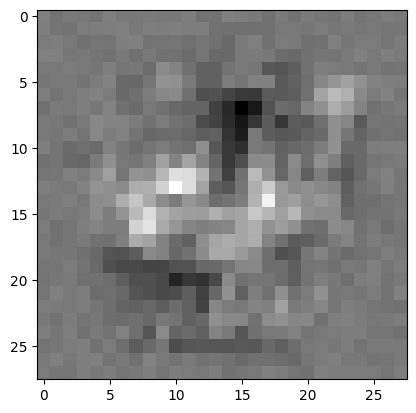

Epoch[74/100], loss: 0.112484, acc: 0.989000


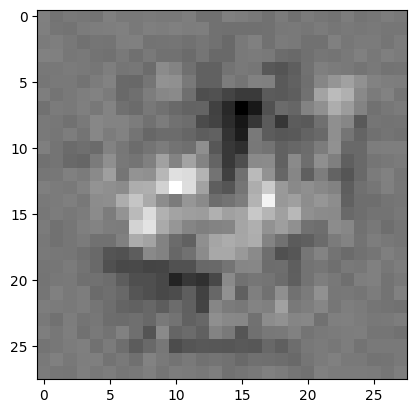

Epoch[75/100], loss: 0.112236, acc: 0.989000


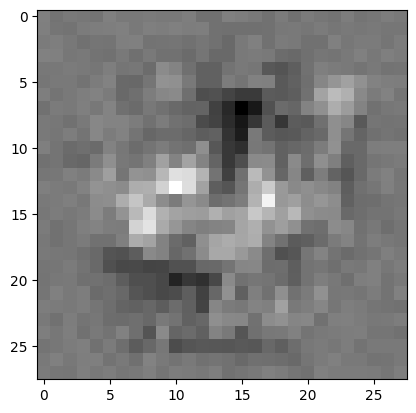

Epoch[76/100], loss: 0.111990, acc: 0.989000


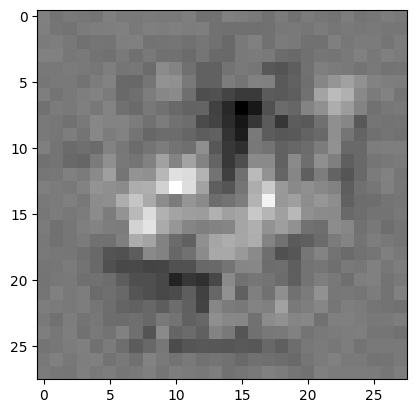

Epoch[77/100], loss: 0.111744, acc: 0.989000


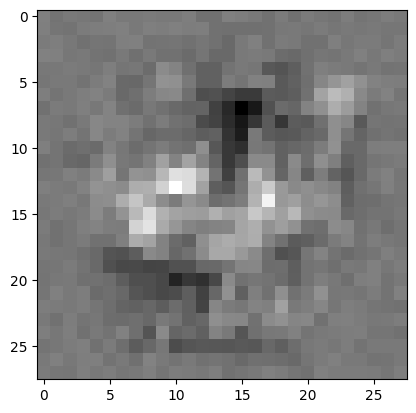

Epoch[78/100], loss: 0.111499, acc: 0.989000


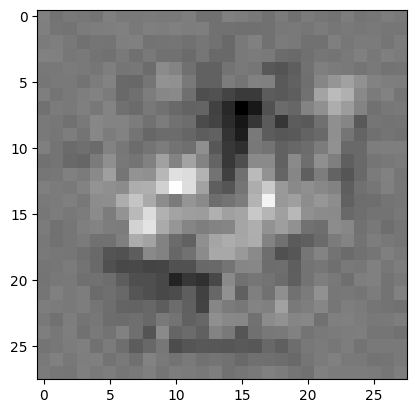

Epoch[79/100], loss: 0.111255, acc: 0.989000


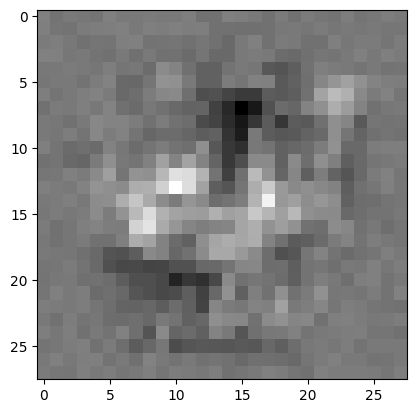

Epoch[80/100], loss: 0.111013, acc: 0.989000


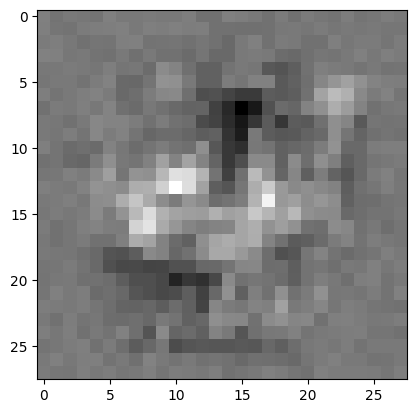

Epoch[81/100], loss: 0.110771, acc: 0.989000


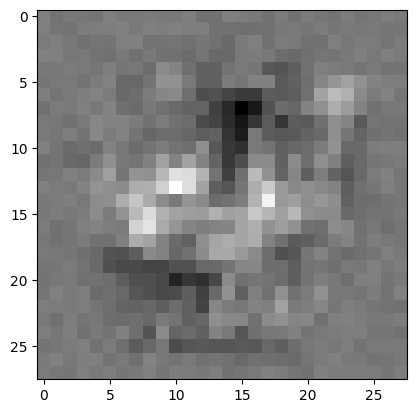

Epoch[82/100], loss: 0.110530, acc: 0.989000


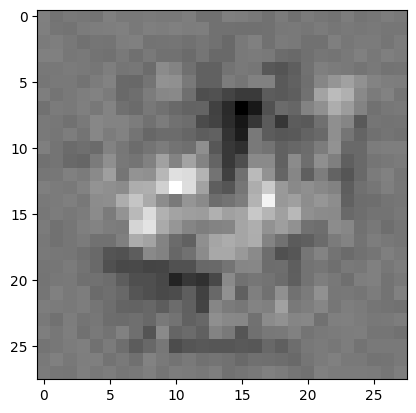

Epoch[83/100], loss: 0.110290, acc: 0.989000


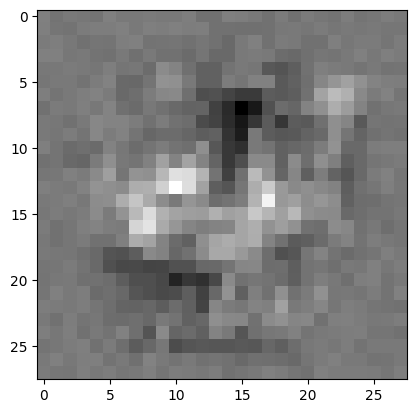

Epoch[84/100], loss: 0.110051, acc: 0.989000


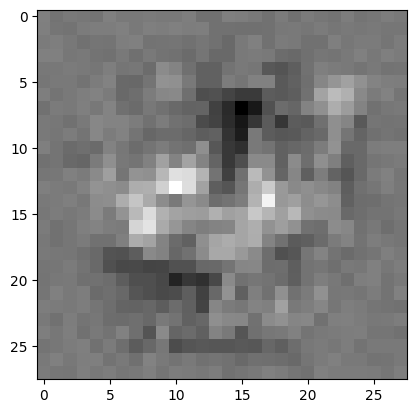

Epoch[85/100], loss: 0.109813, acc: 0.989000


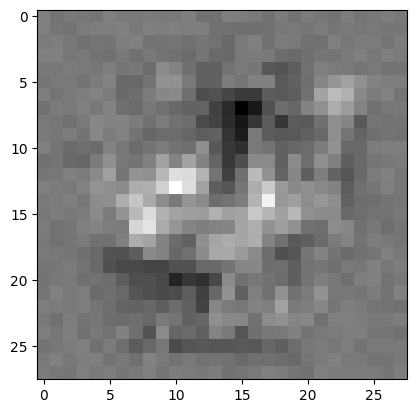

Epoch[86/100], loss: 0.109576, acc: 0.989000


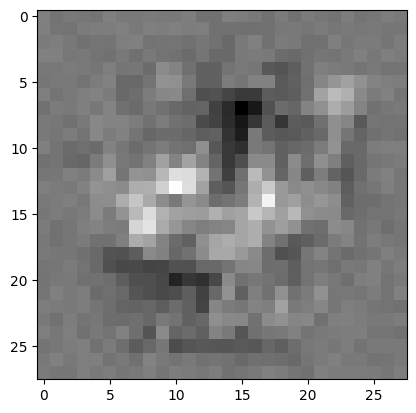

Epoch[87/100], loss: 0.109340, acc: 0.989000


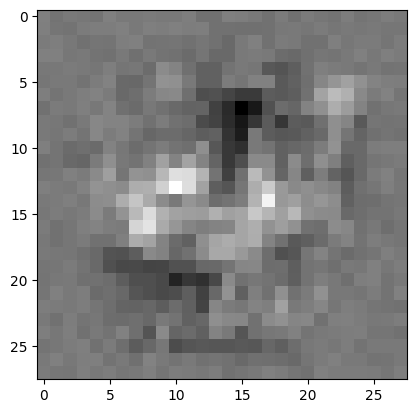

Epoch[88/100], loss: 0.109104, acc: 0.989000


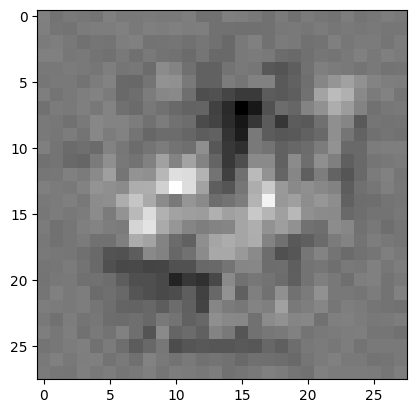

Epoch[89/100], loss: 0.108870, acc: 0.989000


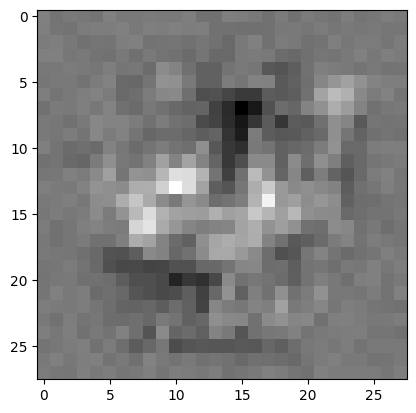

Epoch[90/100], loss: 0.108636, acc: 0.990000


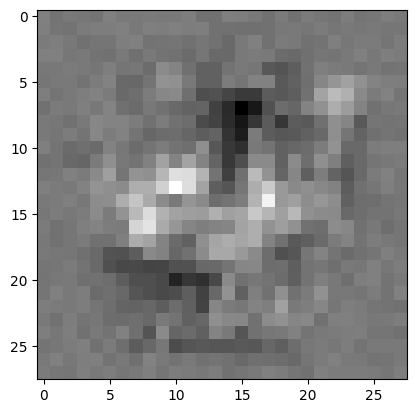

Epoch[91/100], loss: 0.108404, acc: 0.990000


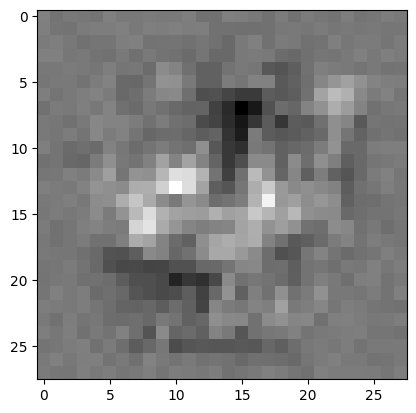

Epoch[92/100], loss: 0.108172, acc: 0.990000


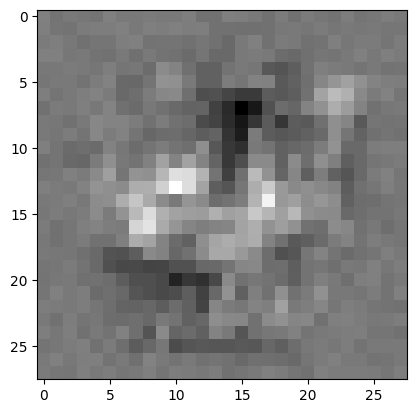

Epoch[93/100], loss: 0.107941, acc: 0.991000


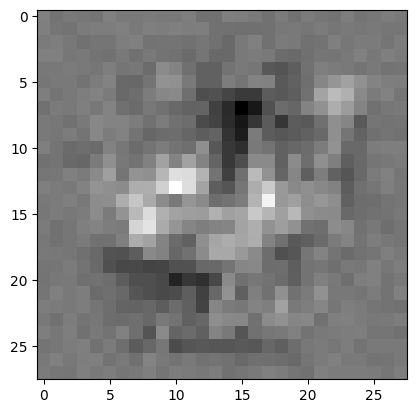

Epoch[94/100], loss: 0.107711, acc: 0.991000


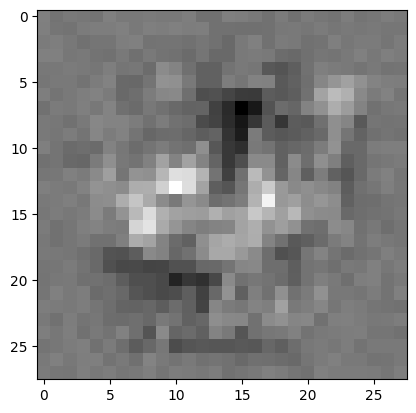

Epoch[95/100], loss: 0.107482, acc: 0.991000


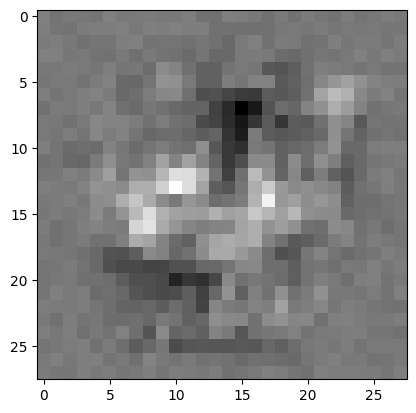

Epoch[96/100], loss: 0.107254, acc: 0.991000


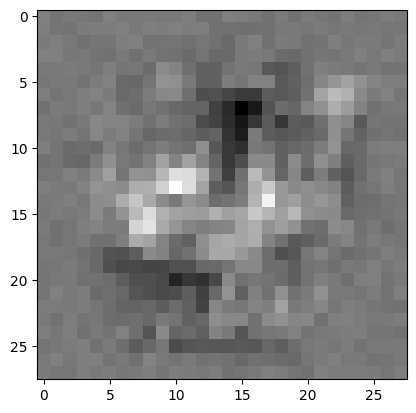

Epoch[97/100], loss: 0.107027, acc: 0.991000


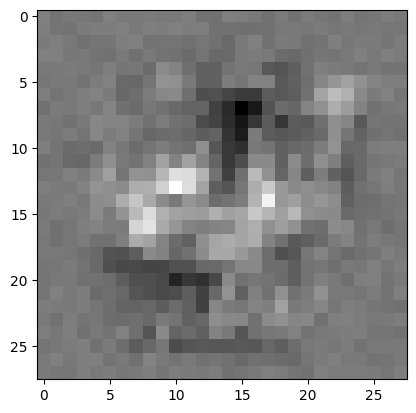

Epoch[98/100], loss: 0.106801, acc: 0.991000


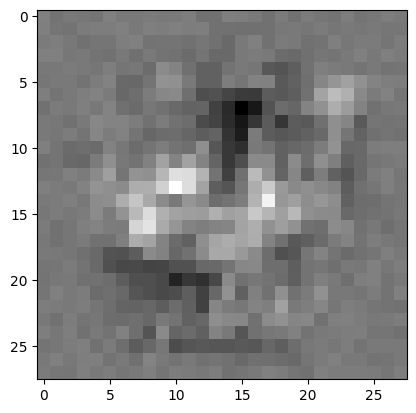

Epoch[99/100], loss: 0.106575, acc: 0.991000


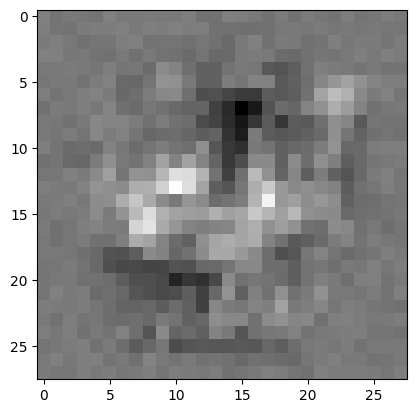

Epoch[100/100], loss: 0.106351, acc: 0.991000


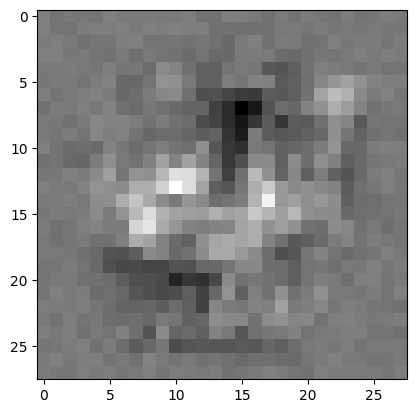

In [ ]:
#1-
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()



    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))

    # Visualizando pesos da classe 4
    weights = model.state_dict()['weight']
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()




<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
R. [60000,28x28]
2. Qual é o shape da saída da rede?
R. [60000,10]
3. Qual é o número total de parâmetros da rede, incluindo o bias?
R. 7850

# Aprendizados
